In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_excel(r"/content/Assignment.xlsx")

In [7]:
# Load the Excel file as an ExcelFile object
excel_file = pd.ExcelFile(r"/content/Assignment.xlsx")

# Get the names of all sheets in the file
sheet_names = excel_file.sheet_names
print("List of Sheets:", sheet_names)  # Display sheet names

List of Sheets: ['UserDetails.csv', 'CookingSessions.csv', 'OrderDetails.csv']


In [9]:
# Load each sheet using the sheet names
user_details_df = excel_file.parse(sheet_name="UserDetails.csv")
cooking_sessions_df = excel_file.parse(sheet_name="CookingSessions.csv")
order_details_df = excel_file.parse(sheet_name="OrderDetails.csv")

# Load each sheet using the sheet names
user_details_df = excel_file.parse(sheet_name="UserDetails.csv")
cooking_sessions_df = excel_file.parse(sheet_name="CookingSessions.csv")
order_details_df = excel_file.parse(sheet_name="OrderDetails.csv")


In [16]:
# Check for missing values in all three DataFrames
print("Missing Values in UserDetails:\n", user_details_df.isnull().sum())
print("\nMissing Values in CookingSessions:\n", cooking_sessions_df.isnull().sum())
print("\nMissing Values in OrderDetails:\n", order_details_df.isnull().sum())

Missing Values in UserDetails:
 User ID              0
User Name            0
Age                  0
Location             0
Registration Date    0
Phone                0
Email                0
Favorite Meal        0
Total Orders         0
dtype: int64

Missing Values in CookingSessions:
 Session ID         0
User ID            0
Dish Name          0
Meal Type          0
Session Start      0
Session End        0
Duration (mins)    0
Session Rating     0
dtype: int64

Missing Values in OrderDetails:
 Order ID        0
User ID         0
Order Date      0
Meal Type       0
Dish Name       0
Order Status    0
Amount (USD)    0
Time of Day     0
Rating          2
Session ID      0
dtype: int64


In [17]:
# Remove duplicates from UserDetails
user_details_df = user_details_df.drop_duplicates()

# Remove duplicates from CookingSessions
cooking_sessions_df = cooking_sessions_df.drop_duplicates()

# Remove duplicates from OrderDetails
order_details_df = order_details_df.drop_duplicates()

print("Duplicates removed successfully.")

Duplicates removed successfully.


In [18]:
# Convert date columns in UserDetails
user_details_df['Registration Date'] = pd.to_datetime(user_details_df['Registration Date'])

# Convert date columns in CookingSessions
cooking_sessions_df['Session Start'] = pd.to_datetime(cooking_sessions_df['Session Start'])
cooking_sessions_df['Session End'] = pd.to_datetime(cooking_sessions_df['Session End'])

# Convert date columns in OrderDetails
order_details_df['Order Date'] = pd.to_datetime(order_details_df['Order Date'])

print("Date columns standardized successfully.")

Date columns standardized successfully.


In [19]:
# Convert numeric columns in UserDetails
user_details_df['Age'] = user_details_df['Age'].astype(int)
user_details_df['Total Orders'] = user_details_df['Total Orders'].astype(int)

# Convert numeric columns in CookingSessions
cooking_sessions_df['Duration (mins)'] = cooking_sessions_df['Duration (mins)'].astype(int)
cooking_sessions_df['Session Rating'] = cooking_sessions_df['Session Rating'].astype(float)

# Convert numeric columns in OrderDetails
order_details_df['Amount (USD)'] = order_details_df['Amount (USD)'].astype(float)
order_details_df['Rating'] = order_details_df['Rating'].fillna(0).astype(float)  # Fill missing ratings with 0

print("Numeric columns standardized successfully.")

Numeric columns standardized successfully.


In [20]:
# Display data types of each DataFrame
print("UserDetails Data Types:\n", user_details_df.info())
print("\nCookingSessions Data Types:\n", cooking_sessions_df.info())
print("\nOrderDetails Data Types:\n", order_details_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   User ID            10 non-null     object        
 1   User Name          10 non-null     object        
 2   Age                10 non-null     int64         
 3   Location           10 non-null     object        
 4   Registration Date  10 non-null     datetime64[ns]
 5   Phone              10 non-null     object        
 6   Email              10 non-null     object        
 7   Favorite Meal      10 non-null     object        
 8   Total Orders       10 non-null     int64         
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 848.0+ bytes
UserDetails Data Types:
 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           -------------

In [21]:
# Merge UserDetails with CookingSessions on 'User ID'
merged_df1 = pd.merge(cooking_sessions_df, user_details_df, on='User ID', how='left')

# Preview the result
print("Merged DataFrame (UserDetails + CookingSessions):\n", merged_df1.head())

Merged DataFrame (UserDetails + CookingSessions):
   Session ID User ID        Dish Name  Meal Type       Session Start  \
0       S001    U001        Spaghetti     Dinner 2024-12-01 19:00:00   
1       S002    U002     Caesar Salad      Lunch 2024-12-01 12:00:00   
2       S003    U003  Grilled Chicken     Dinner 2024-12-02 19:30:00   
3       S004    U001         Pancakes  Breakfast 2024-12-02 07:30:00   
4       S005    U004     Caesar Salad      Lunch 2024-12-03 13:00:00   

          Session End  Duration (mins)  Session Rating      User Name  Age  \
0 2024-12-01 19:30:00               30             4.5  Alice Johnson   28   
1 2024-12-01 12:20:00               20             4.0      Bob Smith   35   
2 2024-12-02 20:10:00               40             4.8    Charlie Lee   42   
3 2024-12-02 08:00:00               30             4.2  Alice Johnson   28   
4 2024-12-03 13:15:00               15             4.7    David Brown   27   

        Location Registration Date         Phon

In [22]:
# Merge the intermediate DataFrame with OrderDetails on 'User ID' and 'Session ID'
final_merged_df = pd.merge(merged_df1, order_details_df, on=['User ID', 'Session ID'], how='left')

# Preview the final merged DataFrame
print("Final Merged DataFrame:\n", final_merged_df.head())

Final Merged DataFrame:
   Session ID User ID      Dish Name_x Meal Type_x       Session Start  \
0       S001    U001        Spaghetti      Dinner 2024-12-01 19:00:00   
1       S002    U002     Caesar Salad       Lunch 2024-12-01 12:00:00   
2       S003    U003  Grilled Chicken      Dinner 2024-12-02 19:30:00   
3       S004    U001         Pancakes   Breakfast 2024-12-02 07:30:00   
4       S005    U004     Caesar Salad       Lunch 2024-12-03 13:00:00   

          Session End  Duration (mins)  Session Rating      User Name  Age  \
0 2024-12-01 19:30:00               30             4.5  Alice Johnson   28   
1 2024-12-01 12:20:00               20             4.0      Bob Smith   35   
2 2024-12-02 20:10:00               40             4.8    Charlie Lee   42   
3 2024-12-02 08:00:00               30             4.2  Alice Johnson   28   
4 2024-12-03 13:15:00               15             4.7    David Brown   27   

   ... Favorite Meal Total Orders Order ID Order Date Meal Type_y  

In [23]:
# Check the columns and data types in the final merged DataFrame
print(final_merged_df.info())

# Preview the first few rows
print("Final Data Preview:\n", final_merged_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Session ID         16 non-null     object        
 1   User ID            16 non-null     object        
 2   Dish Name_x        16 non-null     object        
 3   Meal Type_x        16 non-null     object        
 4   Session Start      16 non-null     datetime64[ns]
 5   Session End        16 non-null     datetime64[ns]
 6   Duration (mins)    16 non-null     int64         
 7   Session Rating     16 non-null     float64       
 8   User Name          16 non-null     object        
 9   Age                16 non-null     int64         
 10  Location           16 non-null     object        
 11  Registration Date  16 non-null     datetime64[ns]
 12  Phone              16 non-null     object        
 13  Email              16 non-null     object        
 14  Favorite Mea

In [24]:
# Total number of unique sessions
total_sessions = final_merged_df['Session ID'].nunique()

# Count of completed orders
completed_orders = final_merged_df[final_merged_df['Order Status'] == 'Completed']['Order ID'].nunique()

# Calculate conversion rate
conversion_rate = (completed_orders / total_sessions) * 100
print(f"Conversion Rate: {conversion_rate:.2f}%")

Conversion Rate: 87.50%


In [29]:
# Check column names in the merged DataFrame
print(final_merged_df.columns)

Index(['Session ID', 'User ID', 'Dish Name_x', 'Meal Type_x', 'Session Start',
       'Session End', 'Duration (mins)', 'Session Rating', 'User Name', 'Age',
       'Location', 'Registration Date', 'Phone', 'Email', 'Favorite Meal',
       'Total Orders', 'Order ID', 'Order Date', 'Meal Type_y', 'Dish Name_y',
       'Order Status', 'Amount (USD)', 'Time of Day', 'Rating'],
      dtype='object')


In [30]:
# Use Dish Name_x (from CookingSessions) for analysis
popular_dishes = final_merged_df['Dish Name_x'].value_counts()
print("Top 5 Popular Dishes Cooked:\n", popular_dishes.head(5))

# Use Dish Name_y (from OrderDetails) for analysis
ordered_dishes = final_merged_df['Dish Name_y'].value_counts()
print("Top 5 Popular Dishes Ordered:\n", ordered_dishes.head(5))

Top 5 Popular Dishes Cooked:
 Dish Name_x
Spaghetti          4
Grilled Chicken    4
Caesar Salad       3
Pancakes           2
Veggie Burger      2
Name: count, dtype: int64
Top 5 Popular Dishes Ordered:
 Dish Name_y
Spaghetti          4
Grilled Chicken    4
Caesar Salad       3
Pancakes           2
Veggie Burger      2
Name: count, dtype: int64


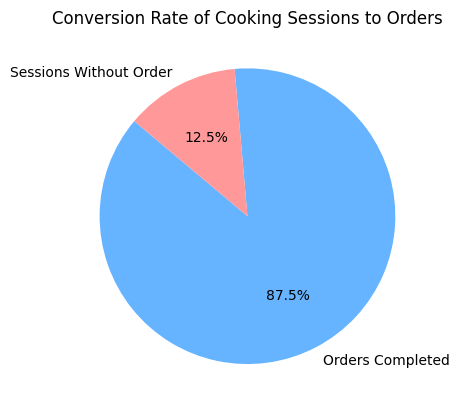

In [31]:
import matplotlib.pyplot as plt

# Data for pie chart
labels = ['Orders Completed', 'Sessions Without Order']
sizes = [
    completed_orders,
    total_sessions - completed_orders
]
colors = ['#66b3ff', '#ff9999']  # Custom colors for the chart

# Create the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Conversion Rate of Cooking Sessions to Orders')
plt.show()



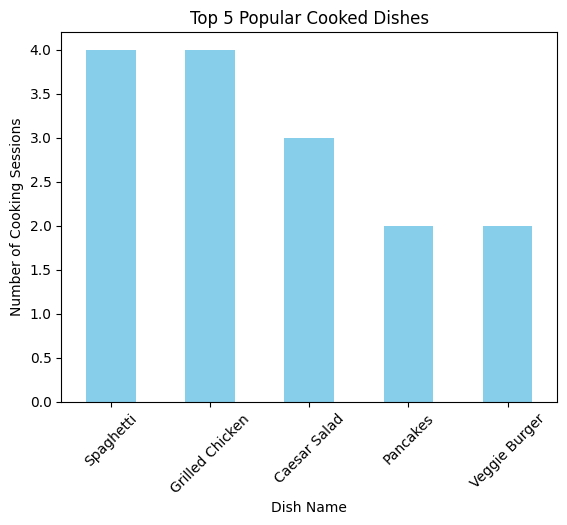

In [33]:
# Top 5 popular cooked dishes (Dish Name_x)
popular_cooked_dishes = final_merged_df['Dish Name_x'].value_counts().head(5)

# Bar chart for cooked dishes
popular_cooked_dishes.plot(kind='bar', color='skyblue')
plt.title('Top 5 Popular Cooked Dishes')
plt.xlabel('Dish Name')
plt.ylabel('Number of Cooking Sessions')
plt.xticks(rotation=45)
plt.show()

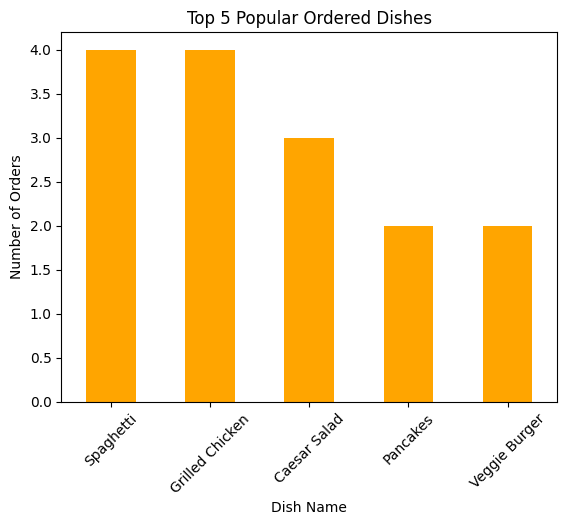

In [34]:
# Top 5 popular ordered dishes (Dish Name_y)
popular_ordered_dishes = final_merged_df['Dish Name_y'].value_counts().head(5)

# Bar chart for ordered dishes
popular_ordered_dishes.plot(kind='bar', color='orange')
plt.title('Top 5 Popular Ordered Dishes')
plt.xlabel('Dish Name')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

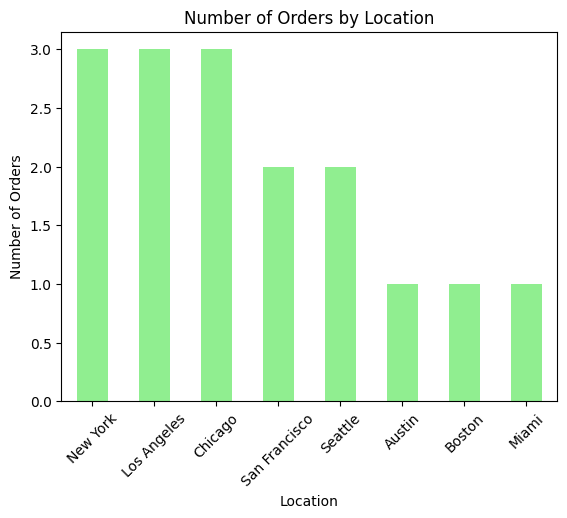

In [36]:
# Calculate orders by location
orders_by_location = final_merged_df['Location'].value_counts()

# Bar chart for orders by location
orders_by_location.plot(kind='bar', color='lightgreen')
plt.title('Number of Orders by Location')
plt.xlabel('Location')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()